# Gradient Boosting Machines

- AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.

- Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.

2001, Friedman

-----

# Boosting Yöntemlerine Giriş

Zayıf öğrencileri bir araya getirip güçlü bir öğrenci ortaya çıkarmak fikrine dayanır. (1990, Kearns ve Valiant)

----

# Adaptive Boosting(AdaBoost)

Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrini hayata geçiren algoritmadır. (1996-1999, Schapires ve Freund)

------

- Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.

- Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının(residuals) üzerine kurularak(fit) oluşturulur.

- GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimiza edebilen Gradient descent algoritmasını kullanmaktadır.

- GB bir çok temel öğrenici tipi(base learner type) kullanabilir. (Trees, linear terms, splines, ...)

- Cost fonksiyonları ve link fonksiyonları modifiye edilebilir.

- Boosting + Gradient Descent

-----

# 1. Model (GBM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")

df = hit.copy()

df = df.dropna()

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [4]:
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")

X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [5]:
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [6]:
y = df["Salary"]

y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [8]:
gbm_model = GradientBoostingRegressor()

gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

------------

# 2.Tahmin (GBM)

In [9]:
gbm_model.predict(X_test)

array([ 685.15071204,  834.82596335, 1267.75957397,  172.67984844,
        748.49865388,  339.8008888 ,  242.20809317,  110.14867354,
        837.26390752,  563.15925739,  749.01019009,  835.79373273,
        523.23368175,  246.57759372,  318.88341065, 1205.23069973,
        769.16863855,   94.0020671 ,  682.75367256,  297.09583646,
        379.08048176,  828.33480946,  788.0209016 ,  689.3270842 ,
        456.82826994,   86.14859478,  896.58121198,  382.23423014,
        574.64181026,  170.66952149,  102.20084047,  651.69768525,
        481.79780747,  212.70193768,  232.04243785,  880.33837838,
       1562.3222044 ,  224.45352435,  169.62013769,  528.55809709,
         81.36613684,  143.38512242,  576.89265065,  713.45933943,
       1411.7322702 ,  780.38774977,  465.73810495,  110.7910639 ,
        244.55122044,  753.12829155,  757.81318945,  500.52526616,
        766.92268562,  199.02588395,   85.61393395,  991.60578228,
        666.48650307,  691.50983757,  310.2543966 , 1427.00849

In [10]:
y_pred = gbm_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

356.28027518612816

----------

# 3. Model Doğrulama / Model Tuning (GBM)

In [11]:
gbm_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.2],
              "max_depth" : [3, 5, 8, 50, 100],
              "n_estimators" : [200, 500, 1000, 2000],
              "subsample" : [1, 0.5, 0.75]}

In [14]:
gbm = GradientBoostingRegressor()

gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  5.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [15]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}

In [16]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 200, subsample = 0.5)

gbm_tuned.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
y_pred = gbm_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

333.10019850879956

In [18]:
gbm_tuned.feature_importances_

array([0.01563479, 0.0396623 , 0.02968046, 0.05380166, 0.0202122 ,
       0.08742163, 0.05503062, 0.01628939, 0.11155594, 0.0810408 ,
       0.0703162 , 0.20594737, 0.04343799, 0.10676318, 0.02046669,
       0.02709416, 0.00359649, 0.00658126, 0.00546686])

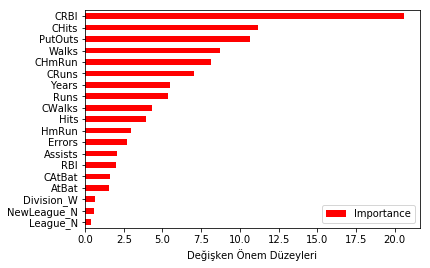

In [19]:
Importance = pd.DataFrame({"Importance" : gbm_tuned.feature_importances_ * 100}, index = X_train.columns)

Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind = "barh", color = "red")

plt.xlabel("Değişken Önem Düzeyleri");

-----------